In [54]:
import requests
import pandas as pd

number_of_pages = 11
#number_of_ads = number_of_pages * per_page
# Грузия: 37,28, Казахстан: 106, 40, Беларусь: 45,16, Азербайджан: 4, 9, Кыргызстан: 10,48,  Узбекистан: 43,97, Другие регионы: 58, 1001

job_title = ["'Data scientist' or 'Data analyst' or 'ML' or 'AI' or 'Machine Learning' or 'Artificial Intelligence' or 'Аналитик данных' or 'Data Engineer' or 'Инженер данных' or 'Reinforcement learning' or 'Аналитик-исследователь' or 'Нейросеть' or 'Искусственный интеллект' or 'Машинное обучение'"]
areas = [1001]
for job in job_title:
    for area in areas:
        data=[]
        for i in range(number_of_pages):
            url = 'https://api.hh.ru/vacancies'
            par = {'text': job, 'area':area,'per_page':'5', 'page':i, 'search_field':'name'}
            r = requests.get(url, params=par)
            e=r.json()
            data.append(e)
            vacancy_details = data[0]['items'][0].keys()
            df = pd.DataFrame(columns= list(vacancy_details))
            ind = 0
            for i in range(len(data)):
                for j in range(len(data[i]['items'])):
                    df.loc[ind] = data[i]['items'][j]
                    ind+=1
        csv_name = str(area)+".csv"
        df.to_csv(csv_name)

In [39]:
csv_name = str(area)+".csv"
df.to_csv(csv_name)

In [55]:
import pandas as pd

df = pd.read_csv("40.csv")
df.head(10)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_time_intervals,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context
0,0,93800296,False,Data Analyst junior,NaN,False,False,"{'id': '160', 'name': 'Алматы', 'url': 'https:...","{'from': 150000, 'to': None, 'currency': 'KZT'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN
1,1,94009209,False,Junior Data Engineer,NaN,False,False,"{'id': '159', 'name': 'Астана', 'url': 'https:...","{'from': 150000, 'to': None, 'currency': 'KZT'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],True,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'part', 'name': 'Частичная занятость'}",NaN,False,NaN
2,2,93626461,False,Начинающий специалист в AI,NaN,False,False,"{'id': '160', 'name': 'Алматы', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN
3,3,93768181,False,Дата-аналитик (Data analyst),NaN,False,False,"{'id': '160', 'name': 'Алматы', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN
4,4,94119939,False,Аналитик данных (Data Analyst),NaN,False,False,"{'id': '159', 'name': 'Астана', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],False,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN
5,5,93930469,False,Software Engineer (Data),NaN,False,True,"{'id': '160', 'name': 'Алматы', 'url': 'https:...","{'from': 625000, 'to': 835000, 'currency': 'KZ...","{'id': 'open', 'name': 'Открытая'}",...,[],[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN
6,6,93209034,False,Аналитик данных / системный администратор,NaN,False,False,"{'id': '160', 'name': 'Алматы', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],True,"[{'id': '66', 'name': 'Менеджер по закупкам'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN
7,7,93943077,False,Senior Data Analyst,NaN,False,True,"{'id': '160', 'name': 'Алматы', 'url': 'https:...","{'from': None, 'to': 1500000, 'currency': 'KZT...","{'id': 'open', 'name': 'Открытая'}",...,[],[],True,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN
8,8,94000565,False,Менеджер Департамента стратегического развития...,NaN,False,False,"{'id': '160', 'name': 'Алматы', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],False,"[{'id': '40', 'name': 'Другое'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN
9,9,93695399,False,Начинающий специалист по социальным сетям (Ins...,NaN,False,False,"{'id': '160', 'name': 'Алматы', 'url': 'https:...","{'from': 50000, 'to': 100000, 'currency': 'KZT...","{'id': 'open', 'name': 'Открытая'}",...,[],[],False,"[{'id': '3', 'name': 'SMM-менеджер, контент-ме...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'part', 'name': 'Частичная занятость'}",NaN,False,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 105 non-null    int64  
 1   id                         105 non-null    int64  
 2   premium                    105 non-null    bool   
 3   name                       105 non-null    object 
 4   department                 1 non-null      object 
 5   has_test                   105 non-null    bool   
 6   response_letter_required   105 non-null    bool   
 7   area                       105 non-null    object 
 8   salary                     18 non-null     object 
 9   type                       105 non-null    object 
 10  address                    28 non-null     object 
 11  response_url               0 non-null      float64
 12  sort_point_distance        0 non-null      float64
 13  published_at               105 non-null    object 

In [42]:
# count number of duplicated rows, do not count id
df.duplicated(subset = df.columns.difference(['id'])).sum()

0

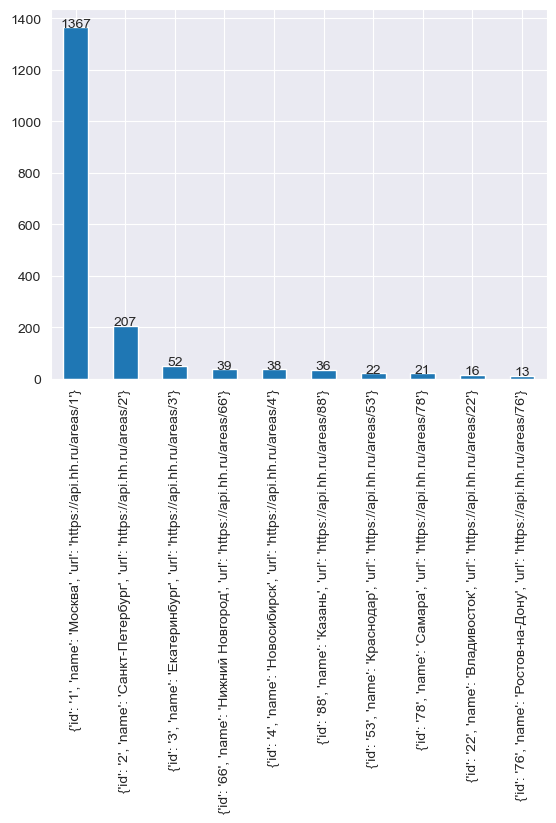

In [43]:
# print the plot of number of vacancies by area, area is a json object, took area['name'] as the name of the area
import matplotlib.pyplot as plt
# df['area'] = df['area'].apply(lambda x: eval(x)['name'])
# df['area'].value_counts().plot(kind='bar')
# plot only 10 top areas with the most vacancies, write number of vacancies on the plot
df['area'].value_counts().nlargest(10).plot(kind='bar')
for i, v in enumerate(df['area'].value_counts().nlargest(10)):
    plt.text(i, v, str(v), ha='center')
# df['area'].value_counts().plot(kind='bar')
plt.show()